<a id="home"></a>
## Sentiment Analysis Using VADER

Credits to this website: <br>
https://www.analyticsvidhya.com/blog/2022/10/sentiment-analysis-using-vader/

`7/10/23:` Research on using other sentiment analysis like Vader and try on sample set. ✔️

`8/10/23:` Implemented Vader on cleaned data sets *(Credits to Kent's code for cleaning and loading to SQL)*. ✔️

`9/10/23:` Added heatmap under "correlation" questions. ✔️*(Will remove this if it get confusing, ultimately we have met our objective and this is just the bonus part.* 😃*)*

⭐ Some findings, **price & review_scores_location** have 1 of the highest correlation value for all cities (Based on heatmap) [Click here](#correlation)

`10/10/23:` Aligning the same questions used in transformer pipeline code, so that we can compared easily *(Credits to Evelyn's code on Q1 -Q4).* Using the same wordcloud code but added a different approach. (Refer to 1st star below) ✔️

⭐ Wordcloud approach: Run Vader to generate postive, negative and neutral then have common words for each category. *(Not sure about this, let me know what yall think about this?)* [Click here](#wordcloud)

⭐ Question 4: I updated the "limit" on the Y axis to make it more **"obvious"** [Click here](#Q4)

⭐ Additional finding: The last part where Evelyn checks on the number of ratings (Matches the ranking on google searchs, except for rome) [Click here](#ADD)

`11/10/23:` Solving the additional questions (Q2, Q3) via VADER, and shall do a small comparision on the result with the tableau approach. *(I still feel tableau is better for presentation)* ✔️ [Click here](#AQ4)

`12/10/23:` Solving the **remaining** additional questions (Q1, Q4) via VADER. *(We will see whether to include this "Solving additional question via VADER" into presentation. I felt might be too lengthy, We can always put it into report or removed it)* ✔️

`13/10/23:` Updated plots color palette as per Airbnb color *(Using the same template where evelyn did her additional finding)* ✔️ *(Let me know what you all think? I can revert back to the previous design if needed.)*

⭐ Updated: On the compound score (code) based on explanatory notes, explanatory notes is correct. *(The explanation and the code are from 2 different source, and I didn't check. My bad.* 😅*)*

⭐ Updated: Remove the sample comments, some comments doesn't match the descriptions. *(Agreed with Evelyn suggestion.* 😃*)*

`14/10/23:` Included explanation on Heatmap correlation values. ✔️ [Click here](#heat)

`15/10/23:` Updated wordcloud code's typos, previously the positive common words shows up in negative clouds also. (Fixed) ✔️

`16/10/23:` Added map to showcase the cities location. ✔️ [Click here](#map)

⭐ Map: You need to run the code once in order to see the map.

`Download vader from nltk`

In [1]:
#nltk.download('vader_lexicon')

### Import packages for data analysis and visualisation

In [2]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
from sqlalchemy import create_engine

# Define connection parameters
db_params = {
    'dbname': 'airbnb',
    'user': 'postgres',
    'password': 'admin', # Just replace the pgadmin password with yours 'password'
    'host': 'localhost', # where your Postgres is hosted
    'port': 5432
}

# Create connection URL
connection_url = 'postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}'.format(**db_params)

# Establish connection
engine = create_engine(connection_url)

### Testing VADER

**VADER** *(Valence Aware Dictionary for Sentiment Reasoning)* is an NLTK module that provides sentiment scores based on the words used. It is a rule-based sentiment analyzer in which the terms are generally labeled as per their semantic orientation as either positive or negative.

First, we will create a sentiment intensity analyzer to categorize our dataset. Then, we use the polarity scores method to determine the sentiment.

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [5]:
# Create sample to test VADER analysis
text = "ThIs MoViE iS Not so GrEaT."

text1 = text.capitalize()
text2 = text.lower()
text3 = "I don't know."

print(text)
print(text1)
print(text2)
print(text3)

ThIs MoViE iS Not so GrEaT.
This movie is not so great.
this movie is not so great.
I don't know.


In [6]:
# %%time

result1 = sia.polarity_scores("I don't like this movie.")
result2 = sia.polarity_scores("This movie is pretty bad.")
result3 = sia.polarity_scores("This movie is ok.")
result4 = sia.polarity_scores("This movie is great.")
result5 = sia.polarity_scores(text)
result6 = sia.polarity_scores(text1)
result7 = sia.polarity_scores(text2)
result8 = sia.polarity_scores(text3)

result = [result1, result2, result3, result4, result5, result6, result7, result8]
result_overall = pd.DataFrame.from_dict(result)

In [7]:
# Drop extra columns
result_overall.drop(['neg', 'neu', 'pos'], axis=1, inplace=True)

In [8]:
result_overall['Sentences'] = ["I don't like this movie.", 'This movie is pretty bad.', 'This movie is ok.', 'This movie is great.',
                              text, text1, text2, text3]

result_overall.insert(0, 'Sentences', result_overall.pop('Sentences'))

**Compound** corresponds to the sum of the valence score of each word in the lexicon and determines the degree of the sentiment rather than the actual value as opposed to the previous ones. Its value is between -1 (most extreme negative sentiment) and +1 (most extreme positive sentiment). Using the compound score can be enough to determine the underlying sentiment of a text, because for:

   - (pos) **Positive** sentiment, compound >= 0.05
   - (neg) **Negative** sentiment, compound <= -0.05
   - (neu) **Neutral** sentiment, compound between -0.05 to 0.05

In [9]:
# Print out test result
result_overall['type']=''

result_overall.loc[result_overall.compound >= 0.05,'type']='postive'
result_overall.loc[(result_overall.compound > -0.05) & (result_overall.compound < 0.05),'type'] ='neutral'
result_overall.loc[result_overall.compound <= -0.05,'type']='negative'

result_overall.rename(index={0:'result 1', 1:'result 2', 2:'result 3', 3:'result 4', 
                             4:'result 5', 5:'result 6', 6:'result 7', 7:'result 8'})

Sentences  compound      type
result 1     I don't like this movie.   -0.2755  negative
result 2    This movie is pretty bad.   -0.0772  negative
result 3            This movie is ok.    0.2960   postive
result 4         This movie is great.    0.6249   postive
result 5  ThIs MoViE iS Not so GrEaT.   -0.6296  negative
result 6  This movie is not so great.   -0.6296  negative
result 7  this movie is not so great.   -0.6296  negative
result 8                I don't know.    0.0000   neutral

<a id="map"></a>
### `Cities that we choose to analyze`

In [10]:
# Making a map using the folium module
import folium
country_map = folium.Map(tiles="cartodb positron")

# Top three smart phone companies by market share in 2016
countries = [
    {'loc': [52.3676,  4.9041], 'label': 'Amsterdam', 'icon': 'hotel'},
    {'loc': [51.5072,  0.1276], 'label': 'London', 'icon': 'house'},
    {'loc': [48.8566, 2.3522], 'label': 'Paris', 'icon': 'house-chimney'},
    {'loc': [40.7128,  -74.0060], 'label': 'New York', 'icon': 'bed'},
    {'loc': [41.9028,  12.4964], 'label': 'Rome', 'icon': 'caravan'},
] 

# Adding markers to the map
for country in countries:
    marker = folium.Marker(location=country['loc'], popup=country['label'],
                          tooltip=folium.Tooltip(country['label'], permanent=True),
                          icon=folium.Icon(color="green", icon=country['icon'], prefix='fa'))
    marker.add_to(country_map)

# The last object in the cell always gets shown in the notebook
country_map

### Business Question 1: For each city, are reviews more positive or negative?

In the context of executing SQL queries with SQLAlchemy, scalar() is a convenience method to retrieve the single number representing the row count directly, without dealing with tuples or other data structures.

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Creating an object of sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

THRESHOLD = 10000
SAMPLE_SIZE = 250


def is_comment_too_long(comment, max_length=500):
    return len(comment) > max_length

table_names = ["amsterdam_review", "london_review", "new_york_review", "paris_review", "rome_review"]


for table_name in table_names:
    # Determine if sampling is needed
    table_size = engine.execute(f"SELECT COUNT(*) FROM {table_name}").scalar()
    if table_size > THRESHOLD:
        query = f"SELECT comments FROM {table_name} ORDER BY RANDOM() LIMIT {SAMPLE_SIZE}"
    else:
        query = f"SELECT comments FROM {table_name}"
        
    # Fetch and process comments
    comments_df = pd.read_sql(query, engine)
    comments_df['comments'] = comments_df['comments'].apply(lambda x: x[:500] if is_comment_too_long(x) else x)
    
    # Analyze sentiments
    comments_df['sentiment']=comments_df['comments'].apply(lambda body: sia.polarity_scores(str(body)))
    comments_df['compound']=comments_df['sentiment'].apply(lambda score_dict:score_dict['compound'])
    
    comments_df['type']=''
    comments_df.loc[comments_df.compound >= 0.05,'type']='postive'
    comments_df.loc[(comments_df.compound > -0.05) & (comments_df.compound < 0.05),'type'] ='neutral'
    comments_df.loc[comments_df.compound <= -0.05,'type']='negative'
        
    # Sampling comments
    pos_comment = comments_df.loc[comments_df['type'] == 'postive']
    neu_comment = comments_df.loc[comments_df['type'] == 'neutral']
    neg_comment = comments_df.loc[comments_df['type'] == 'negative']
      
    # Determine overall sentiment
    positive_count = comments_df['type'].value_counts().get('postive', 0)
    percent_count = round((positive_count/SAMPLE_SIZE)*100, 2)
    overall_sentiment = "Neutral"
    if positive_count > len(comments_df) / 2:
        overall_sentiment = "Positive"
    elif positive_count < len(comments_df) / 2:
        overall_sentiment = "Negative"

    print(f"{table_name} ({'sample' if table_size > THRESHOLD else 'full'}) is {percent_count} % {overall_sentiment}")

amsterdam_review (sample) is 97.6 % Positive
london_review (sample) is 96.4 % Positive
new_york_review (sample) is 96.8 % Positive
paris_review (sample) is 96.4 % Positive
rome_review (sample) is 97.6 % Positive


<a id="wordcloud"></a>
### Question 2: What are the most frequent words for the reviews? What can this tell us about consumer concerns?

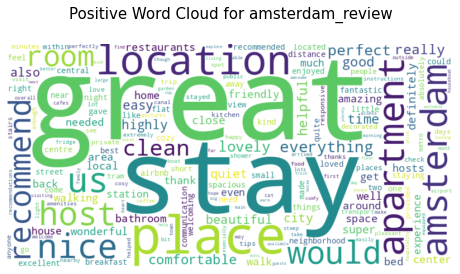

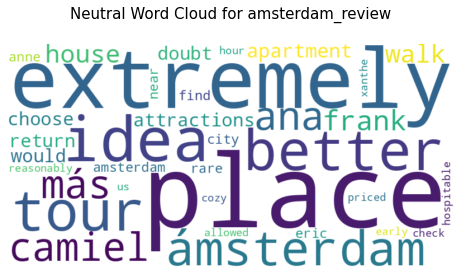

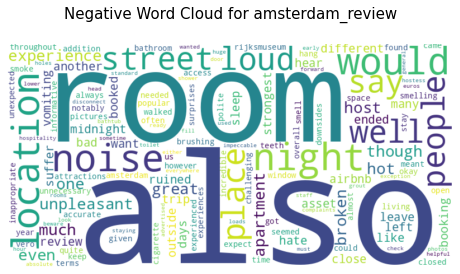


~~~~~~~~~~~~~~~~~~ END of amsterdam_review ~~~~~~~~~~~~~~~~~~




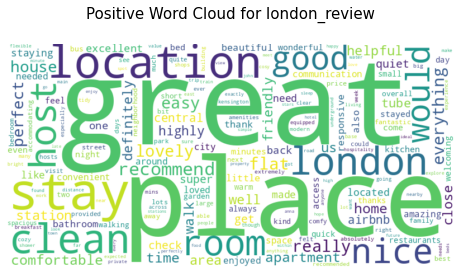

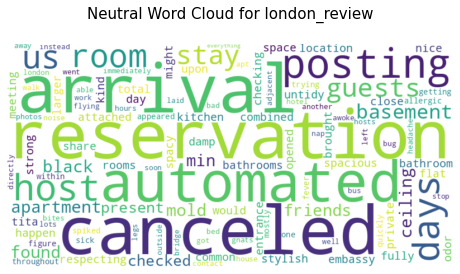

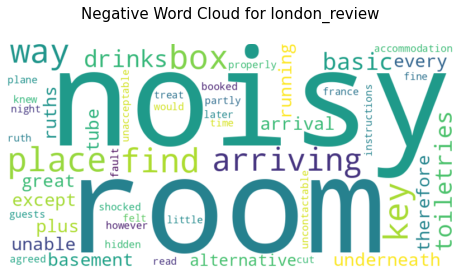


~~~~~~~~~~~~~~~~~~ END of london_review ~~~~~~~~~~~~~~~~~~




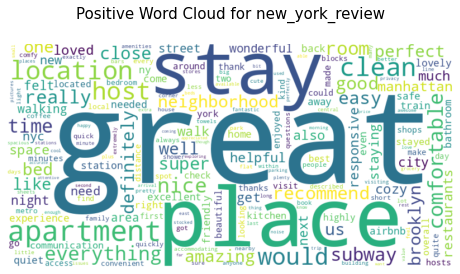

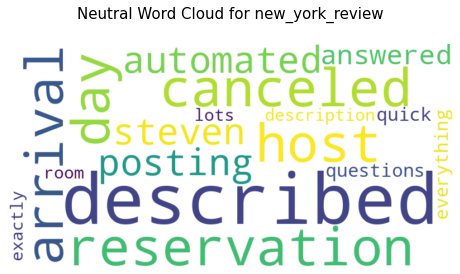

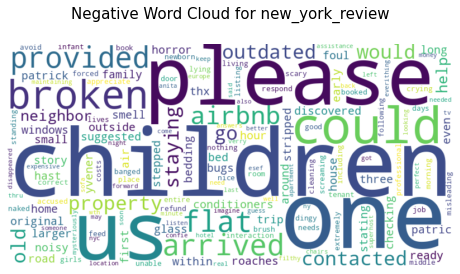


~~~~~~~~~~~~~~~~~~ END of new_york_review ~~~~~~~~~~~~~~~~~~




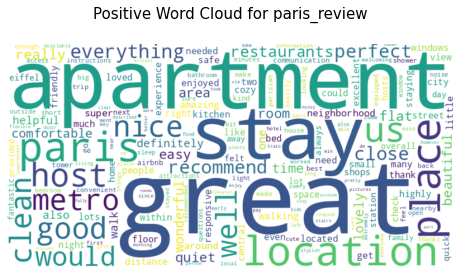

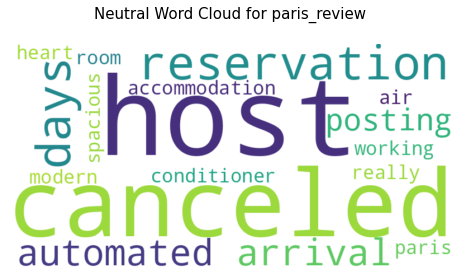

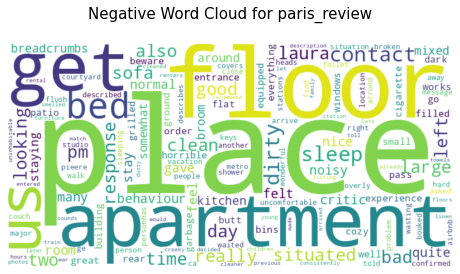


~~~~~~~~~~~~~~~~~~ END of paris_review ~~~~~~~~~~~~~~~~~~




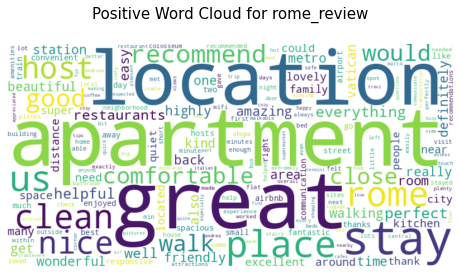

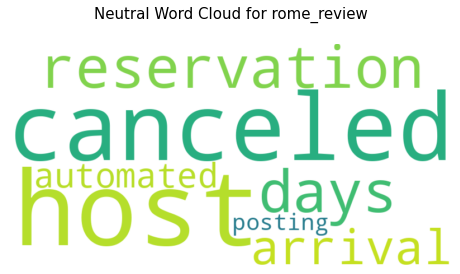

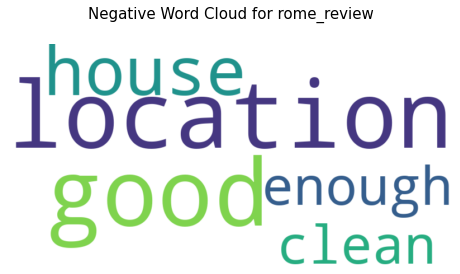


~~~~~~~~~~~~~~~~~~ END of rome_review ~~~~~~~~~~~~~~~~~~




In [12]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Creating an object of sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

table_names = ["amsterdam_review", "london_review", "new_york_review", "paris_review", "rome_review"]

THRESHOLD = 10000
SAMPLE_SIZE = 250

stop_words = set(stopwords.words('english'))

#def is_comment_too_long(comment, max_length=500):
    #return len(comment) > max_length


def preprocess_text(text):
    """Preprocess the text: tokenize, lowercase, remove stopwords."""
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word.isalpha() and word not in stop_words]
    

for table_name in table_names:
    # Determine if sampling is needed
    table_size = engine.execute(f"SELECT COUNT(*) FROM {table_name}").scalar()
    if table_size > THRESHOLD:
        query = f"SELECT comments FROM {table_name} ORDER BY RANDOM() LIMIT {SAMPLE_SIZE}"
    else:
        query = f"SELECT comments FROM {table_name}"

    # Fetch and process comments
    comments_df = pd.read_sql(query, engine)
    #comments_df['comments'] = comments_df['comments'].apply(lambda x: x[:500] if is_comment_too_long(x) else x)
      
    # Analyze sentiments
    comments_df['sentiment']=comments_df['comments'].apply(lambda body: sia.polarity_scores(str(body)))
    comments_df['compound']=comments_df['sentiment'].apply(lambda score_dict:score_dict['compound'])
    
    comments_df['type']=''
    comments_df.loc[comments_df.compound >= 0.05,'type']='postive'
    comments_df.loc[(comments_df.compound > -0.05) & (comments_df.compound < 0.05),'type'] ='neutral'
    comments_df.loc[comments_df.compound <= -0.05,'type']='negative'
    
    # Sampling comments
    pos_comment = comments_df.loc[comments_df['type'] == 'postive']
    neu_comment = comments_df.loc[comments_df['type'] == 'neutral']
    neg_comment = comments_df.loc[comments_df['type'] == 'negative']
        
    # Drop NaN values and preprocess the text
    pos_comments_cloud = pos_comment["comments"].dropna().apply(preprocess_text)
    neu_comments_cloud = neu_comment["comments"].dropna().apply(preprocess_text)
    neg_comments_cloud = neg_comment["comments"].dropna().apply(preprocess_text)
        
    # Count word frequencies
    word_freq_pos = Counter(word for comment in pos_comments_cloud for word in comment)
    word_freq_neu = Counter(word for comment in neu_comments_cloud for word in comment)
    word_freq_neg = Counter(word for comment in neg_comments_cloud for word in comment)
        
    # Generate a word cloud from the word frequencies
    wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_pos)
    wordcloud_neu = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_neu)
    wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_neg)
        
    # Display the word cloud
    #plt.figure(figsize=(14, 10))
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud_pos, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Positive Word Cloud for {table_name}\n", fontsize = 15)
    plt.show()
 
    #plt.figure(figsize=(14, 10))
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud_neu, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Neutral Word Cloud for {table_name}\n", fontsize = 15)
    plt.show()
    
    #plt.figure(figsize=(14, 10))
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud_neg, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Negative Word Cloud for {table_name}\n", fontsize = 15)
    plt.show()
    
    print(f"\n~~~~~~~~~~~~~~~~~~ END of {table_name} ~~~~~~~~~~~~~~~~~~\n\n")
    
    # Get the top 30-50 words
    #top_words = word_freq.most_common(5)  # Adjust this number as desired
    
    #print(f"Top words for table {table_name}: ")
    #for word, freq in top_words:
        #print(f"{word}: {freq}")
    #print("\n")

<a id="correlation"></a>
### Question 3: Is there a correlation between price and review sentiment?
**Answer:** Heatmap to decide which factor does price have the highest correlation value.

<a id="heat"></a>
### `How to interprete Correlation value on Heatmap ?` 

    - A correlation value of 1.0 = Perfect positive correlation (They move in the same direction closely)
    - A correlation value of 0 = No relationship at all (1 variable is moving, but other variable might not be moving)
    - A correlation value of -1.0 = Perfect negative correlation (They move in the opposite direction closely)
<br>

See **"3" Examples** below and notice how 2 variable reacts to one another based on the correlation value on the line chart.

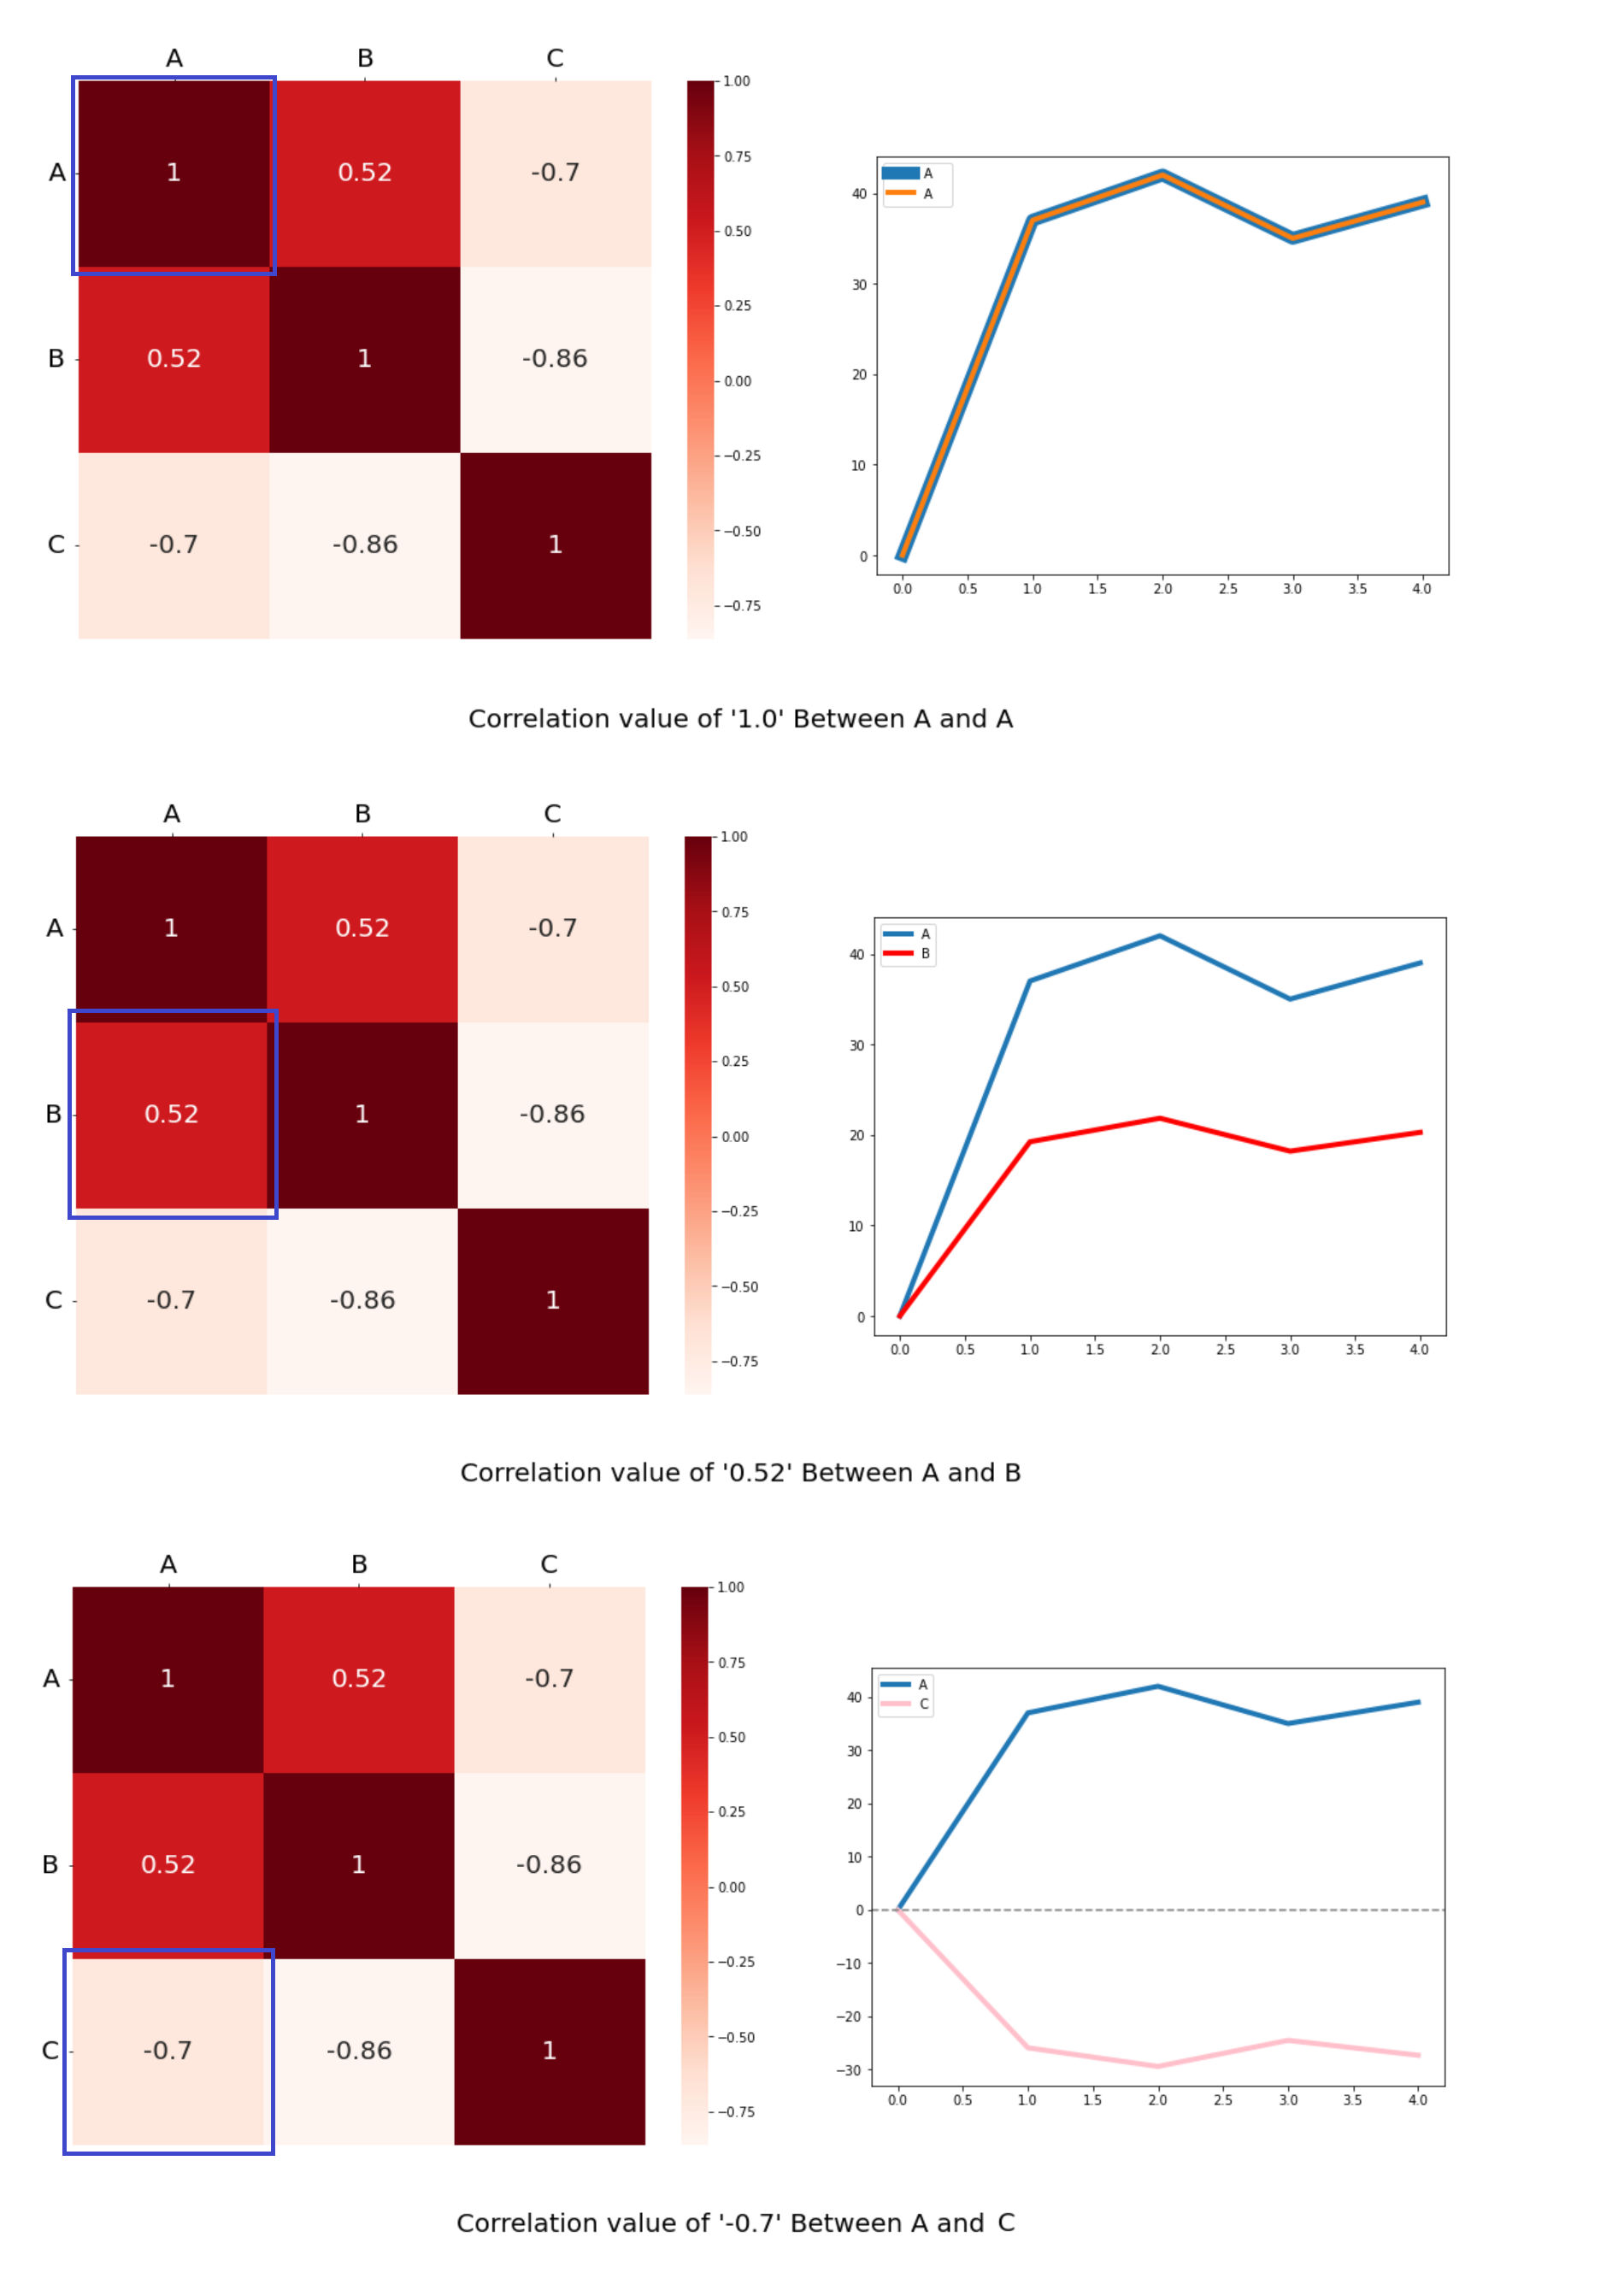

### `End of explanation`

In [13]:
# Note: Data cleaned again on 8/10 to remove "$" and ","
# Checking the data type of the price variable 

query = """
SELECT data_type 
FROM information_schema.columns 
WHERE table_name = 'amsterdam_listing' AND column_name = 'price';
"""

result = pd.read_sql(query, engine)
print(f"{result['data_type'].iloc[0]}")

double precision


#### Calculating correlation

Correlation between sentiment (Compound) score and price in amsterdam: 0.08
Correlation between sentiment (Compound) score and price in london: -0.04
Correlation between sentiment (Compound) score and price in new_york: -0.06
Correlation between sentiment (Compound) score and price in paris: 0.02
Correlation between sentiment (Compound) score and price in rome: -0.03


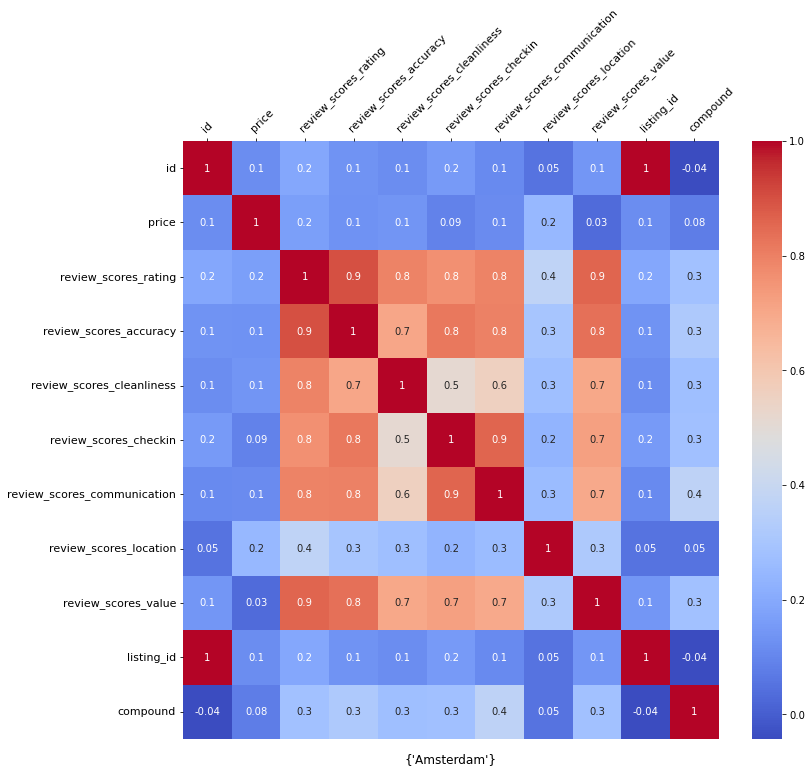

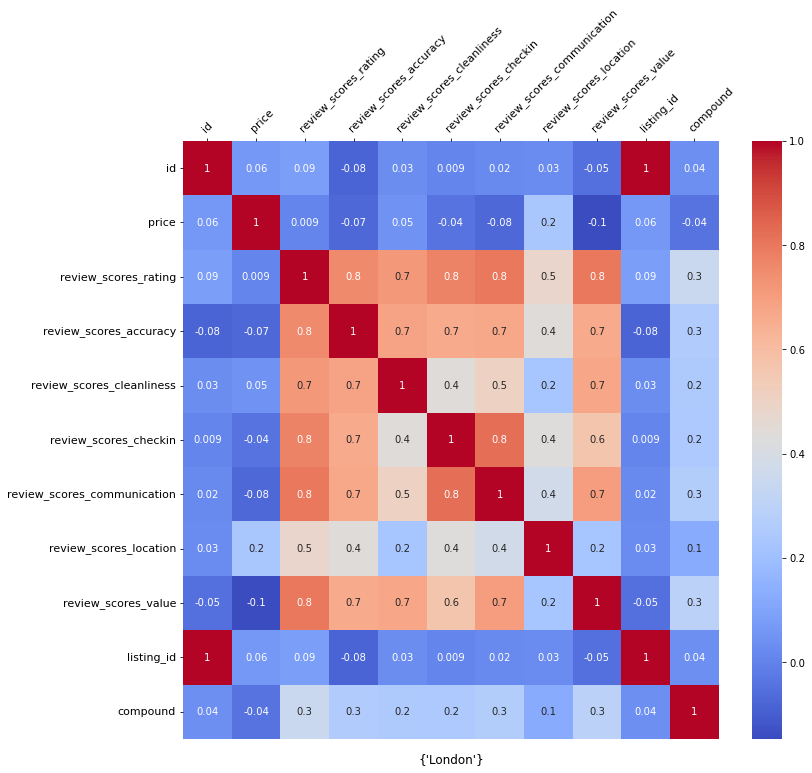

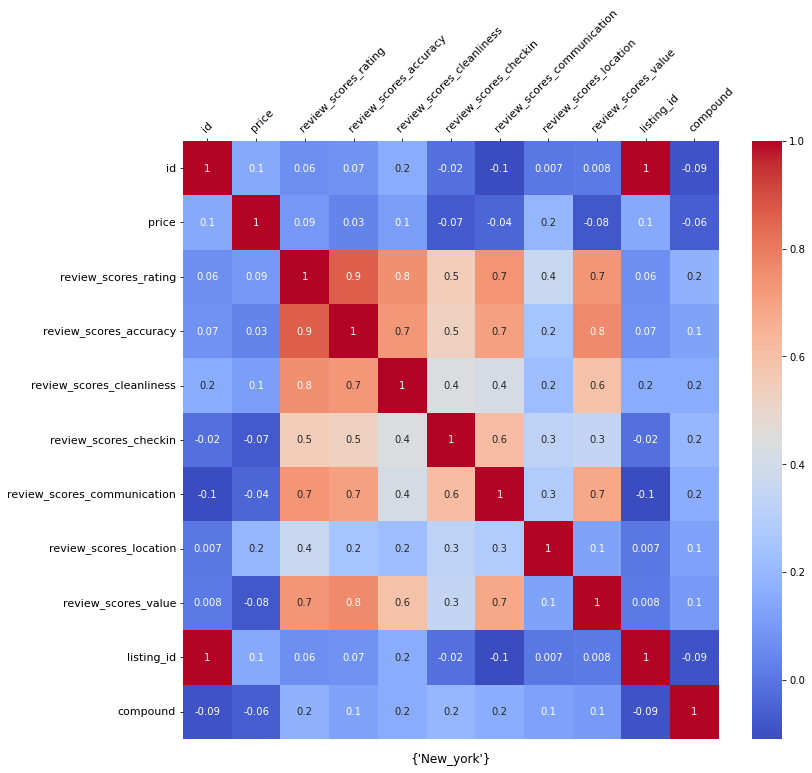

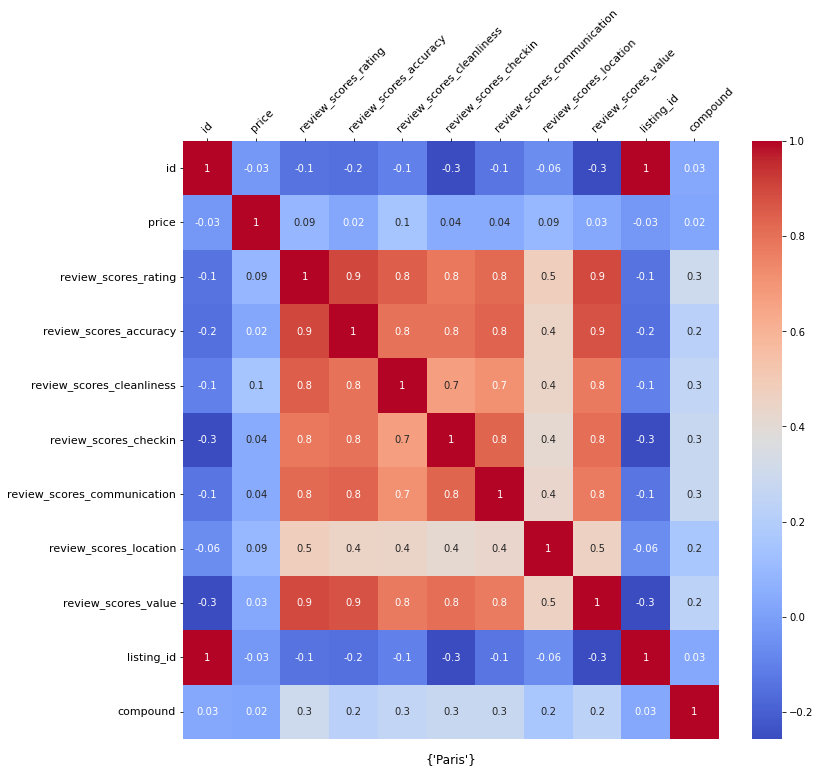

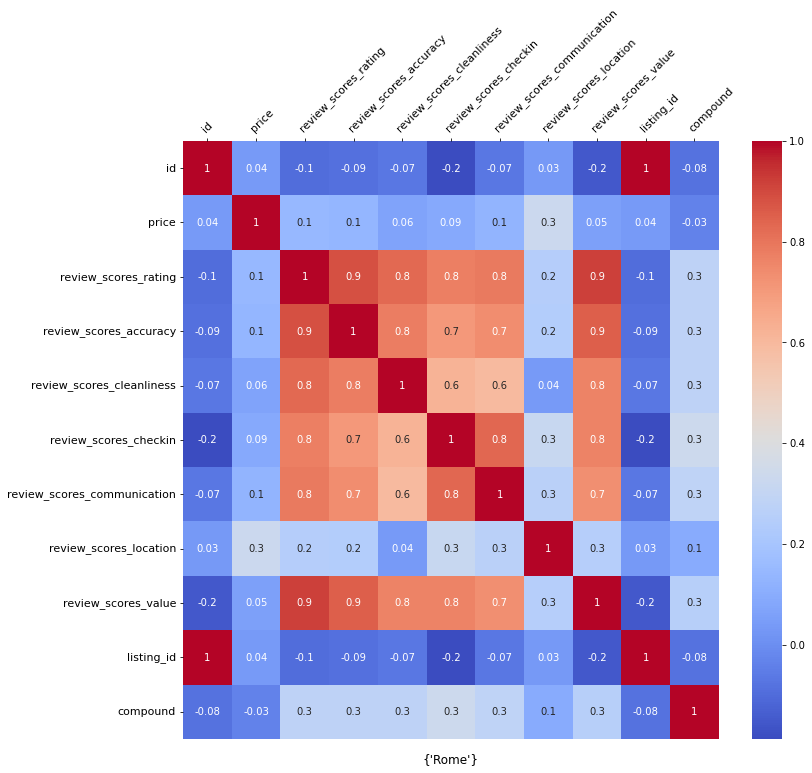

In [14]:
# Updated code on 8/10, after data has been cleaned again
# No need to filter out unexpected characters or drop rows
# Can try a larger sample size

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Creating an object of sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()


def fetch_and_analyze_data(city_name, SAMPLE_SIZE=250):
    # Determine the table name
    table_name = f"{city_name}_listing"

    def truncate_long_comments(comment):
        return comment[:500] if len(comment) > 500 else comment

    combined_query = f"""
    --SELECT L.id, L.price, R.comments
    SELECT *
    FROM {table_name} AS L
    INNER JOIN {table_name.replace('listing', 'review')} AS R ON L.id = R.listing_id
    --JOIN {table_name.replace('listing', 'review')} AS R ON L.id = R.listing_id
    ORDER BY RANDOM() 
    LIMIT {SAMPLE_SIZE}
    """
    
    df = pd.read_sql(combined_query, engine)
    df['comments'] = df['comments'].apply(truncate_long_comments)
    df['sentiment'] = df['comments'].apply(lambda body: sia.polarity_scores(str(body)))
    df['compound']=df['sentiment'].apply(lambda score_dict:score_dict['compound'])
    
    return df


def print_correlation(df, city_name):
    
    correlation = df['compound'].corr(df['price'])
    print(f"Correlation between sentiment (Compound) score and price in {city_name}: {correlation:.2f}")
        
    # Basic Configuration
    fig, axes = plt.subplots(ncols=1, figsize=(12, 11))
    
    corr_matrix1 = df.corr(method='pearson')
    columns1 = corr_matrix1.columns
        
    # Generating Heatmaps
    ax1 = sns.heatmap(corr_matrix1, cmap='coolwarm', annot=True, fmt='.1g')
    
    ax1.set_title({city_name.capitalize()}, y=-0.05)
    ax1.xaxis.tick_top()
    ax1.xaxis.set_label_position('top')
    plt.xticks(rotation=45, fontsize="11", ha='left', rotation_mode='anchor')
    plt.yticks(rotation=0, fontsize="11")

    
# Call the functions
cities = ['amsterdam', 'london', 'new_york', 'paris', 'rome']

for city in cities:
    city_df = fetch_and_analyze_data(city)
    print_correlation(city_df, city)

<a id="Q4"></a>
### Question 4: Which city has the highest review scores (in general, as well as for specific areas?)

`Taken from evelyn's code`, Basically is the same thing, just that I adjusted the Y scale limit to make the result more "obvious"

Create a table of the 5 cities, showing the average score in each review category.

#### Answer: Amsterdam has the highest average review scores across the board.

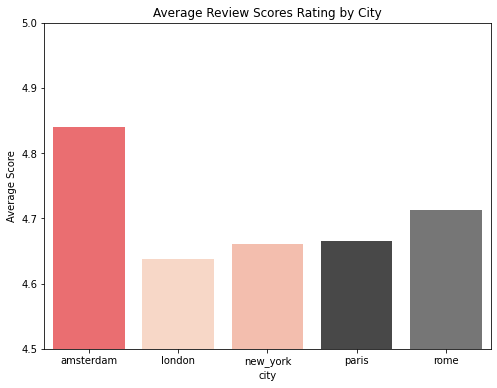

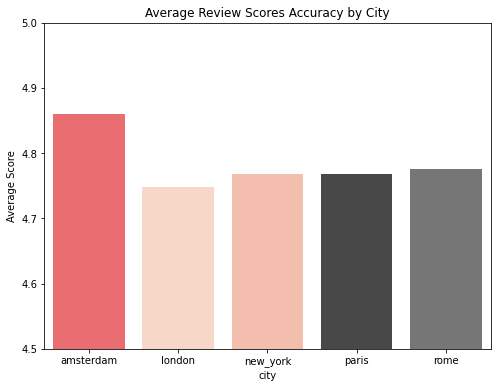

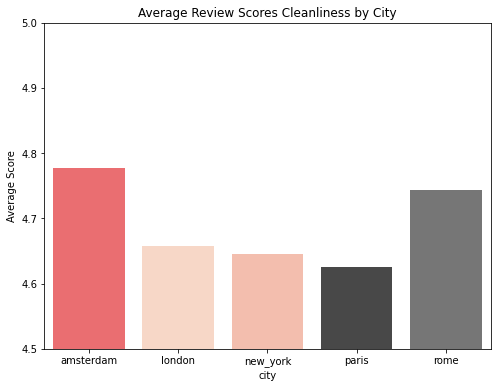

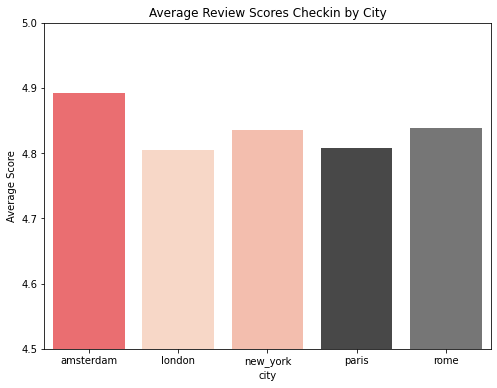

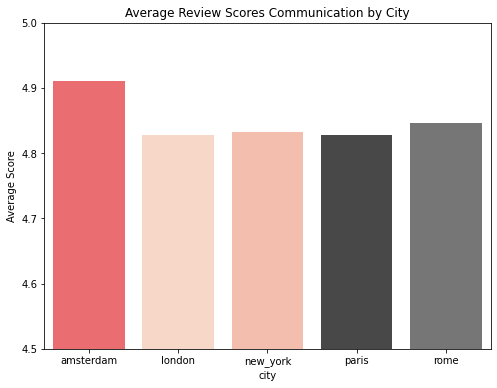

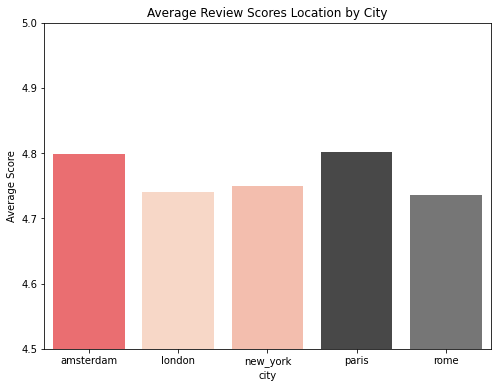

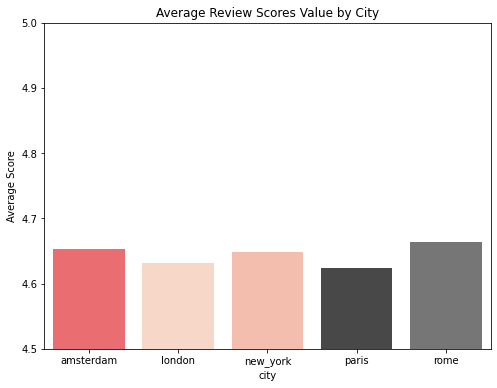

In [15]:
import pandas as pd
from sqlalchemy import create_engine, text

cities = ['amsterdam', 'london', 'new_york', 'paris', 'rome']

review_fields = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                 'review_scores_value']

all_results = []

for city in cities:
    city_results = {'city': city}
    
    with engine.connect() as connection:
        for field in review_fields:
            query_text = text(f"SELECT AVG({field}) AS avg_{field} FROM {city}_listing;")
            result = connection.execute(query_text).fetchone()
            
            city_results[field] = result[0]  # Get the average value from the result
        
        all_results.append(city_results)

df = pd.DataFrame(all_results)
#print(df)

# Visualise the findings
for field in review_fields:
    with engine.connect() as connection:
     
        # Define a custom color palette using a list of colors
        custom_palette = ["#FF595E", "#FFD4BF", "#FFB8A2", "#484848", "#767676"]
        
        plt.figure(figsize=(8,6))
        sns.barplot(x='city', y=field, data=df, palette=custom_palette)
        plt.title(f"Average {field.replace('_', ' ').title()} by City")
        plt.ylabel("Average Score")
        plt.ylim(4.5, 5) #added this line to make the chart more "obvious"
        plt.show()

<a id="ADD"></a>
### `Additional findings from Evelyn.`
#### Checking on the number of ratings -- Amsterdam has significantly less ratings than the other cities, even though it's a Top 5 destination city.

In [16]:
import pandas as pd
from sqlalchemy import create_engine, text

cities = ['amsterdam', 'london', 'new_york', 'paris', 'rome']
reviews = ['review_scores_rating']

all_results = []

for city in cities:
    city_results = {'city': city}
    
    with engine.connect() as connection:
        for field in reviews:
            query_text = text(f"SELECT COUNT(*) FROM {city}_listing;")
                        
            result = connection.execute(query_text).fetchone()
            
            city_results[field] = result[0]
        
        all_results.append(city_results)
    
total = pd.DataFrame(all_results)
total = total.sort_values('review_scores_rating', ascending=False)
print(total.to_string(index=False))

     city  review_scores_rating
   london                 50152
    paris                 47560
 new_york                 23091
     rome                 19502
amsterdam                  6866


<br>

<a id="AQ4"></a>
<u>Analyzing via VADER for additional questions,</u> (See below)<br>
*("IF" the additional questions are to be present in tableau form only, we can remove the codes below or leave it as reference.)*

`Additional Questions for analyzing`
1. Do more experienced Airbnb hosts get more positive or negative reviews?
2. For Airbnb Superhosts, are their reviews more positive or negative? (“Airbnb Superhost” is a designation given to experienced and highly-rated hosts on the Airbnb platform, who meet certain criteria set by Airbnb.)
3. For Airbnb hosts who don’t verify their identity, does this impact their rating?
4. Which types of homes receive the most positive reviews?

### ⭐`Additional` Question 1: Do more experienced Airbnb hosts get more positive or negative reviews?

In order to simplify the analysis for the problem, we split the durations of the host's years of experience by 
   - Less than 5 years, 
   - In between 5 to 10 years, 
   - More than 10 years <br><br>

**Answer:** Not a Convincing yes, because the difference is small based on VADER analysis (Sometime for certain cities, the less experience gets slightly more % for positive review)

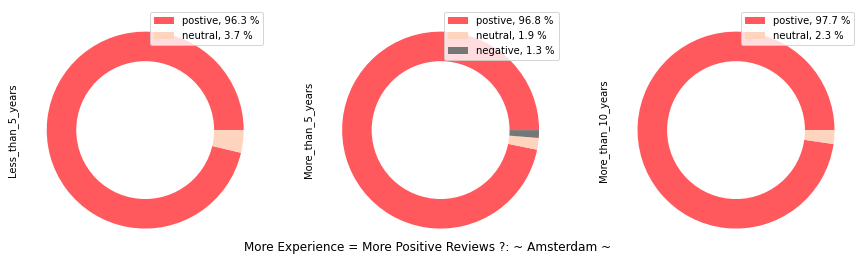

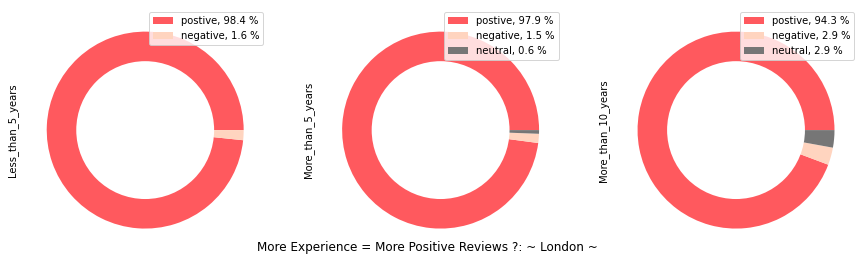

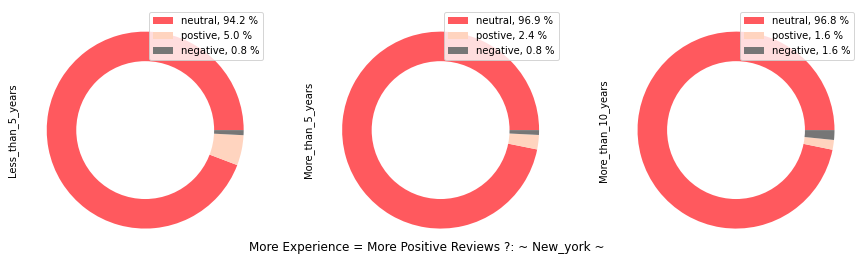

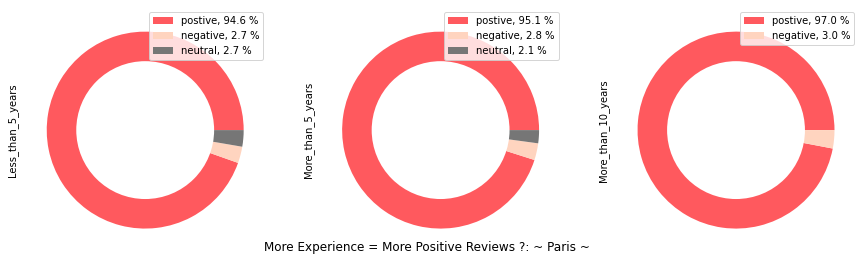

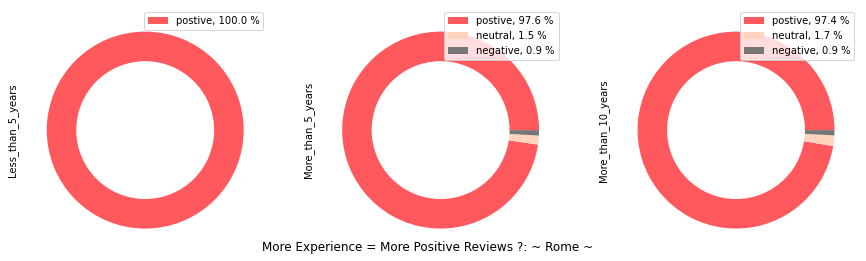

In [17]:
import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Creating an object of sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()


def fetch_and_analyze_data(city_name, SAMPLE_SIZE=500):
    
    # Determine the table name
    table_name = f"{city_name}_listing"

    def truncate_long_comments(comment):
        return comment[:500] if len(comment) > 500 else comment

    combined_query = f"""
    --SELECT L.id, L.price, R.comments
    SELECT *
    FROM {table_name} AS L
    INNER JOIN {table_name.replace('listing', 'review')} AS R ON L.id = R.listing_id
    --JOIN {table_name.replace('listing', 'review')} AS R ON L.id = R.listing_id
    --WHERE host_is_superhost = 'f'
    ORDER BY RANDOM() 
    LIMIT {SAMPLE_SIZE}
    """

    df = pd.read_sql(combined_query, engine)
    df['comments'] = df['comments'].apply(truncate_long_comments)
    df['sentiment'] = df['comments'].apply(lambda body: sia.polarity_scores(str(body)))
    df['compound']=df['sentiment'].apply(lambda score_dict:score_dict['compound'])
    
    df['type']=''
    df.loc[df.compound >= 0.05,'type']='postive'
    df.loc[(df.compound > -0.05) & (df.compound < 0.05),'type'] ='neutral'
    df.loc[df.compound <= -0.05,'type']='negative'
        
    # Sampling comments
    pos_comment = df.loc[df['type'] == 'postive']
    neu_comment = df.loc[df['type'] == 'neutral']
    neg_comment = df.loc[df['type'] == 'negative']
    
    df['host_since'] = pd.to_datetime(df['host_since'])
    current = np.datetime64(datetime.datetime.now())
    df['diff'] = current - df['host_since']
        
    df['day'] = df['diff'].astype('timedelta64[D]').astype(int)
    df['years_exp'] = round(df['day']/365.0)

    return df


def print_host_experience(df, city_name):
    
    Less_than_5_years = df.loc[df['years_exp'] <= 5.0]
    More_than_5_years = df.loc[(df['years_exp'] > 5.0) & (df['years_exp'] <= 10.0)]
    More_than_10_years = df.loc[df['years_exp'] > 10.0]
    
    # Adding % into legend
    df_less_5_counts = Less_than_5_years['type'].value_counts()
    less_5_percentage = df_less_5_counts / len(Less_than_5_years) * 100
    
    df_more_5_counts = More_than_5_years['type'].value_counts()
    more_5_percentage = df_more_5_counts / len(More_than_5_years) * 100
    
    df_more_10_counts = More_than_10_years['type'].value_counts()
    more_10_percentage = df_more_10_counts / len(More_than_10_years) * 100
    
    # Basic Configuration
    fig, axes = plt.subplots(ncols=3, figsize=(15, 15))
    custom_palette = ["#FF595E", "#FFD4BF", "#767676", "#FFB8A2", "#484848"]
    
    # Plotting of chart
    ax1 = plt.subplot2grid((1,3), (0, 0))
    Less_than_5_years['type'].value_counts().plot(kind='pie', labels=None, colors=custom_palette)

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)    
    
    ax2 = plt.subplot2grid((1,3), (0, 1))
    More_than_5_years['type'].value_counts().plot(kind='pie', labels=None, colors=custom_palette)
    
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)    
    
    ax3 = plt.subplot2grid((1,3), (0, 2))
    More_than_10_years['type'].value_counts().plot(kind='pie', labels=None, colors=custom_palette)
    
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)    
    
    ax1.set_ylabel('Less_than_5_years')
    ax2.set_ylabel('More_than_5_years')
    ax3.set_ylabel('More_than_10_years')
    
    ax1.legend(loc='upper right', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(df.type.unique(), less_5_percentage)])
    ax2.legend(loc='upper right', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(df.type.unique(), more_5_percentage)])
    ax3.legend(loc='upper right', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(df.type.unique(), more_10_percentage)])
    
    plt.suptitle((f"More Experience = More Positive Reviews ?: ~ {city_name.capitalize()} ~"), y=0.4)


# Call the functions
cities = ['amsterdam', 'london', 'new_york', 'paris', 'rome']

for city in cities:
    city_df = fetch_and_analyze_data(city)
    print_host_experience(city_df, city)

<br>

### ⭐`Additional` Question 2: For Airbnb Superhosts, are their reviews more positive or negative? 

“Airbnb Superhost” is a designation given to experienced and highly-rated hosts on the Airbnb platform, who meet certain criteria set by Airbnb. <br><br>

**Answer:** And again, the difference is small between Super and Non-Super Host.

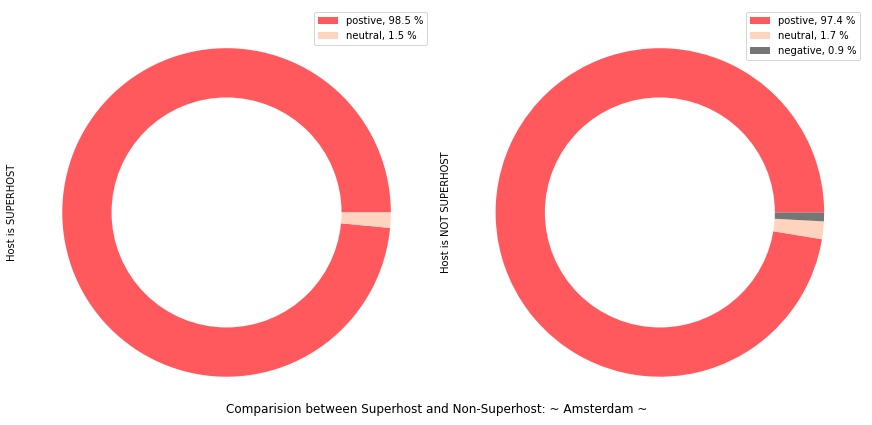

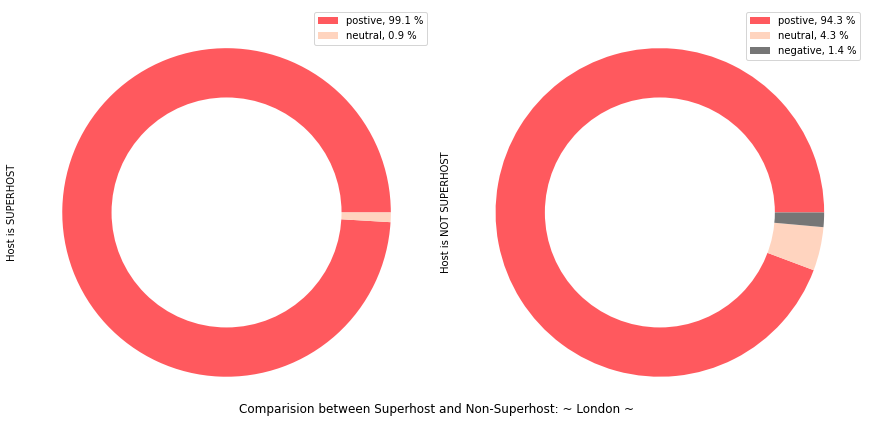

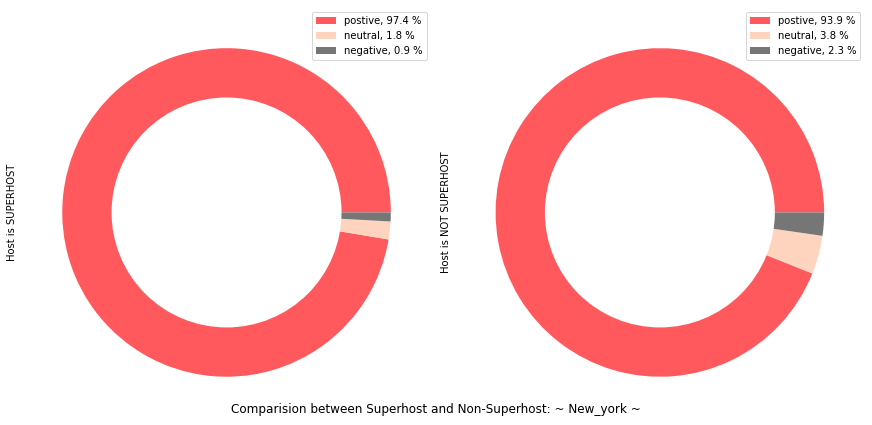

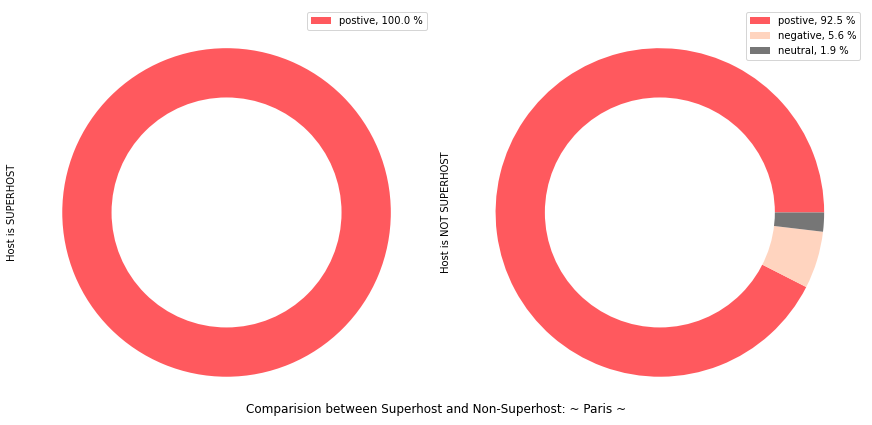

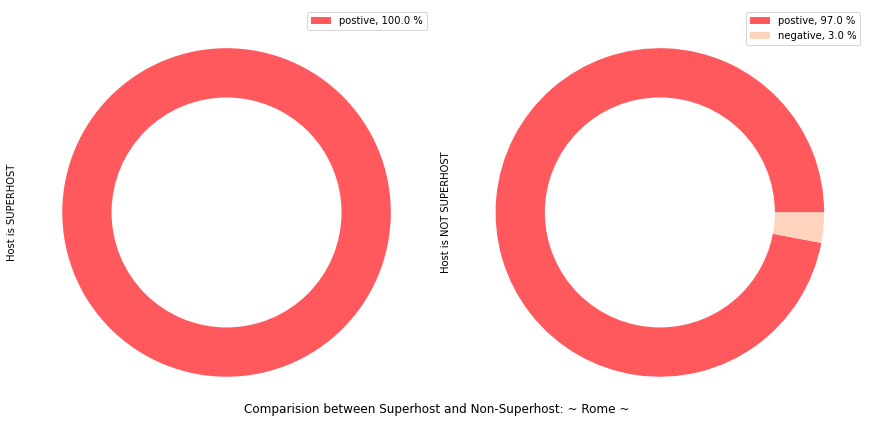

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Creating an object of sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()


def fetch_and_analyze_data(city_name, SAMPLE_SIZE=250):
    # Determine the table name
    table_name = f"{city_name}_listing"

    def truncate_long_comments(comment):
        return comment[:500] if len(comment) > 500 else comment

    combined_query = f"""
    --SELECT L.id, L.price, R.comments
    SELECT *
    FROM {table_name} AS L
    INNER JOIN {table_name.replace('listing', 'review')} AS R ON L.id = R.listing_id
    --JOIN {table_name.replace('listing', 'review')} AS R ON L.id = R.listing_id
    --WHERE host_is_superhost = 'f'
    ORDER BY RANDOM() 
    LIMIT {SAMPLE_SIZE}
    """

    df = pd.read_sql(combined_query, engine)
    df['comments'] = df['comments'].apply(truncate_long_comments)
    df['sentiment'] = df['comments'].apply(lambda body: sia.polarity_scores(str(body)))
    df['compound']=df['sentiment'].apply(lambda score_dict:score_dict['compound'])
    
    df['type']=''
    df.loc[df.compound >= 0.05,'type']='postive'
    df.loc[(df.compound > -0.05) & (df.compound < 0.05),'type'] ='neutral'
    df.loc[df.compound <= -0.05,'type']='negative'    
    
    # Sampling comments
    pos_comment = df.loc[df['type'] == 'postive']
    neu_comment = df.loc[df['type'] == 'neutral']
    neg_comment = df.loc[df['type'] == 'negative']
   
    return df

def print_pie(df, city_name):
    
    df_superhost = df.loc[df['host_is_superhost']=='t']
    df_NOTsuperhost = df.loc[df['host_is_superhost']=='f']
    
    # Adding % into legend
    df_supercounts = df_superhost['type'].value_counts()
    percentage = df_supercounts / len(df_superhost) * 100
    
    df_NOTsupercounts = df_NOTsuperhost['type'].value_counts()
    NOTpercentage = df_NOTsupercounts / len(df_NOTsuperhost) * 100
    
    # Basic Configuration
    fig, axes = plt.subplots(ncols=2, figsize=(12, 12), constrained_layout=True)
    custom_palette = ["#FF595E", "#FFD4BF", "#767676", "#FFB8A2", "#484848"]

    # Ploting
    ax1 = plt.subplot2grid((1,2), (0, 0))
    df_superhost['type'].value_counts().plot(kind='pie', labels=None, colors=custom_palette)
    
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    ax2 = plt.subplot2grid((1,2), (0, 1))
    df_NOTsuperhost['type'].value_counts().plot(kind='pie', labels=None, colors=custom_palette)
    
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    ax1.set_ylabel('Host is SUPERHOST')
    ax2.set_ylabel('Host is NOT SUPERHOST')
    
    ax1.legend(loc='upper right', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(df.type.unique(), percentage)])
    ax2.legend(loc='upper right', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(df.type.unique(), NOTpercentage)])
    
    plt.suptitle((f"Comparision between Superhost and Non-Superhost: ~ {city_name.capitalize()} ~"), y=0.28)


# Call the functions
cities = ['amsterdam', 'london', 'new_york', 'paris', 'rome']

for city in cities:
    city_df = fetch_and_analyze_data(city)
    print_pie(city_df, city)

<br>

### ⭐`Additional` Question 3: For Airbnb hosts who don’t verify their identity, does this impact their rating? 

When you host or help with hosting on Airbnb, you may be asked to provide information such as your legal name, date of birth, or government ID for verification.. <br><br>

**Answer:** Might see significant difference for certain cities.

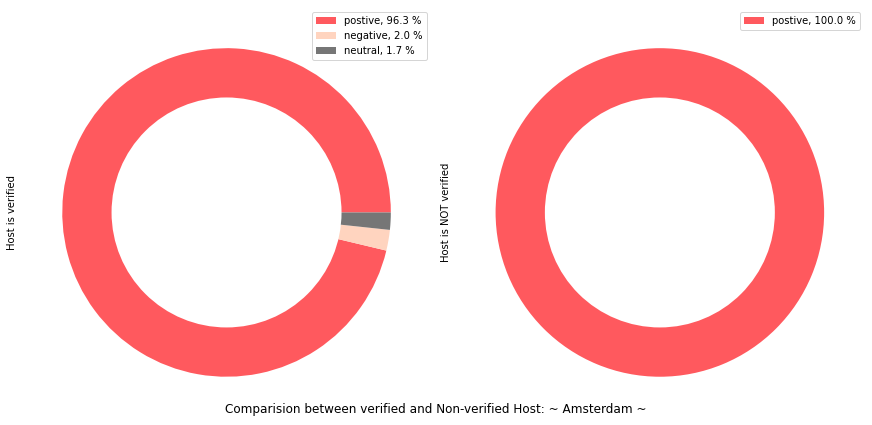

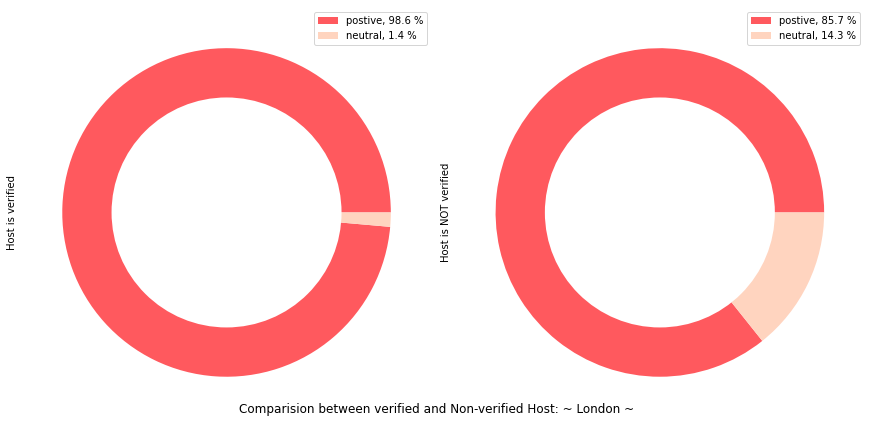

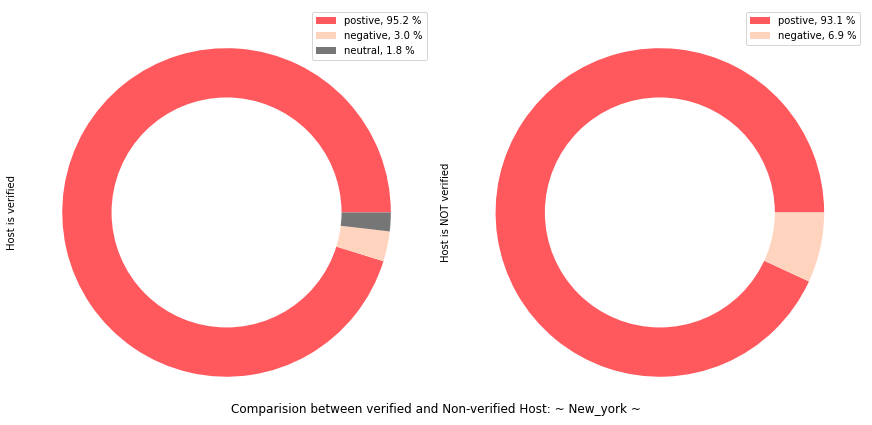

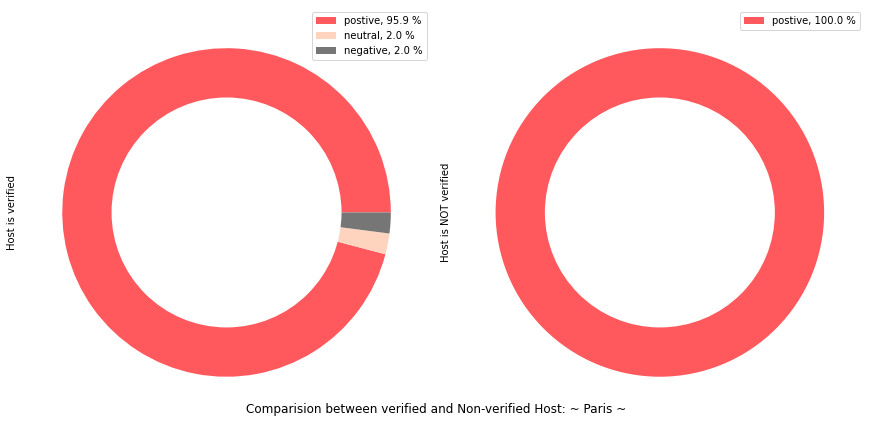

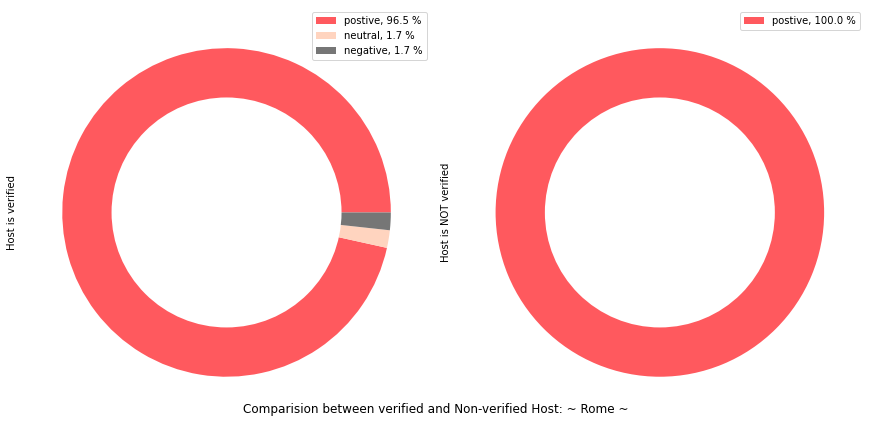

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Creating an object of sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()


def fetch_and_analyze_data(city_name, SAMPLE_SIZE=300):
    # Determine the table name
    table_name = f"{city_name}_listing"

    def truncate_long_comments(comment):
        return comment[:500] if len(comment) > 500 else comment

    combined_query = f"""
    --SELECT L.id, L.price, R.comments
    SELECT *
    FROM {table_name} AS L
    INNER JOIN {table_name.replace('listing', 'review')} AS R ON L.id = R.listing_id
    --JOIN {table_name.replace('listing', 'review')} AS R ON L.id = R.listing_id
    --WHERE host_is_superhost = 'f'
    ORDER BY RANDOM() 
    LIMIT {SAMPLE_SIZE}
    """

    df = pd.read_sql(combined_query, engine)
    df['comments'] = df['comments'].apply(truncate_long_comments)
    df['sentiment'] = df['comments'].apply(lambda body: sia.polarity_scores(str(body)))
    df['compound']=df['sentiment'].apply(lambda score_dict:score_dict['compound'])
    
    df['type']=''
    df.loc[df.compound >= 0.05,'type']='postive'
    df.loc[(df.compound > -0.05) & (df.compound < 0.05),'type'] ='neutral'
    df.loc[df.compound <= -0.05,'type']='negative'
    
    # Sampling comments
    pos_comment = df.loc[df['type'] == 'postive']
    neu_comment = df.loc[df['type'] == 'neutral']
    neg_comment = df.loc[df['type'] == 'negative']
   
    return df

def print_pie(df, city_name):
    
    df_verified = df.loc[df['host_identity_verified']=='t']
    df_NOTverified = df.loc[df['host_identity_verified']=='f']
    
    # Basic Configuration
    fig, axes = plt.subplots(ncols=2, figsize=(12, 12), constrained_layout=True)
    custom_palette = ["#FF595E", "#FFD4BF", "#767676", "#FFB8A2", "#484848"]
    
    # Adding % into legend
    df_counts = df_verified['type'].value_counts()
    percentage = df_counts / len(df_verified) * 100
    
    df_NOTcounts = df_NOTverified['type'].value_counts()
    NOTpercentage = df_NOTcounts / len(df_NOTverified) * 100
    
    
    # Ploting
    ax1 = plt.subplot2grid((1,2), (0, 0))
    df_verified['type'].value_counts().plot(kind='pie', labels=None, colors=custom_palette)
    
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
        
    ax2 = plt.subplot2grid((1,2), (0, 1))
    df_NOTverified['type'].value_counts().plot(kind='pie', labels=None, colors=custom_palette)
    
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    ax1.set_ylabel('Host is verified')
    ax2.set_ylabel('Host is NOT verified')
    
    ax1.legend(loc='upper right', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(df.type.unique(), percentage)])
    ax2.legend(loc='upper right', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(df.type.unique(), NOTpercentage)])
    
    plt.suptitle((f"Comparision between verified and Non-verified Host: ~ {city_name.capitalize()} ~"), y=0.28)
    
# Call the functions
cities = ['amsterdam', 'london', 'new_york', 'paris', 'rome']

for city in cities:
    city_df = fetch_and_analyze_data(city)
    print_pie(city_df, city)

<br>

### ⭐`Additional` Question 4: Which types of homes receive the most positive reviews?? 

We compare based on the "Property type" defined by Airbnb. <br><br>

**Answer:** WINNER = " Entire rental unit " (For all 5 cities).

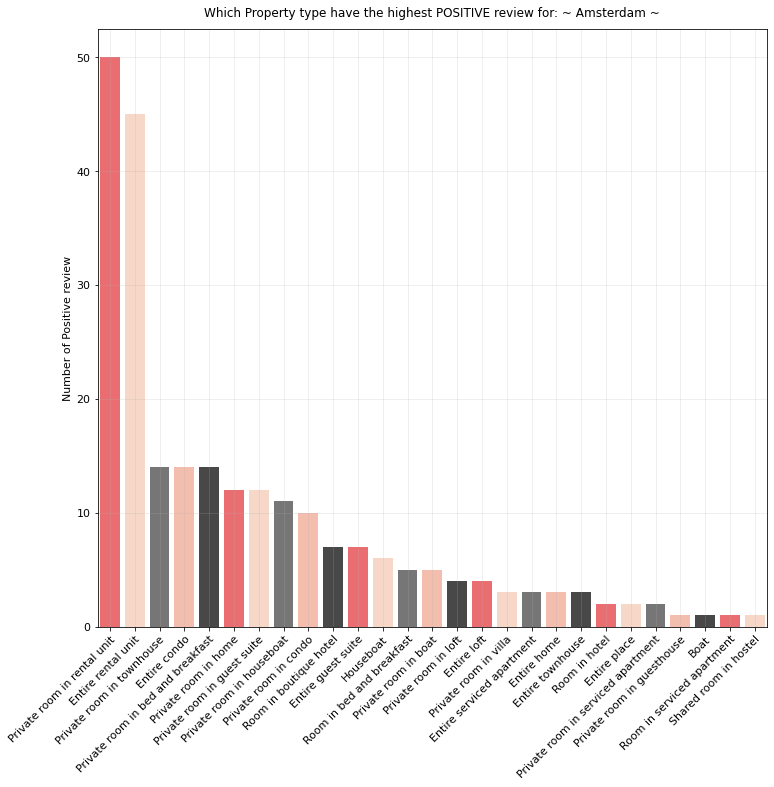

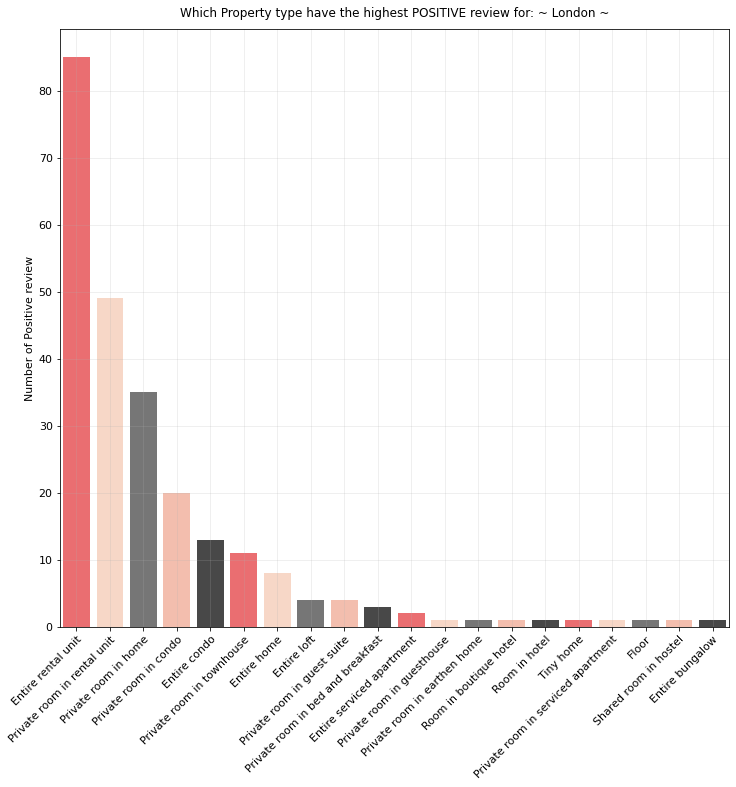

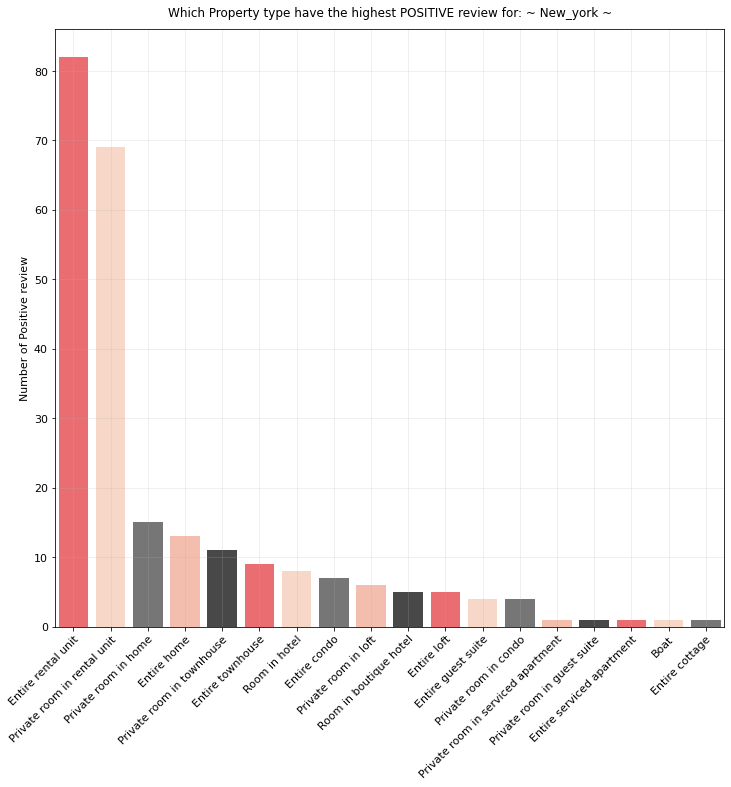

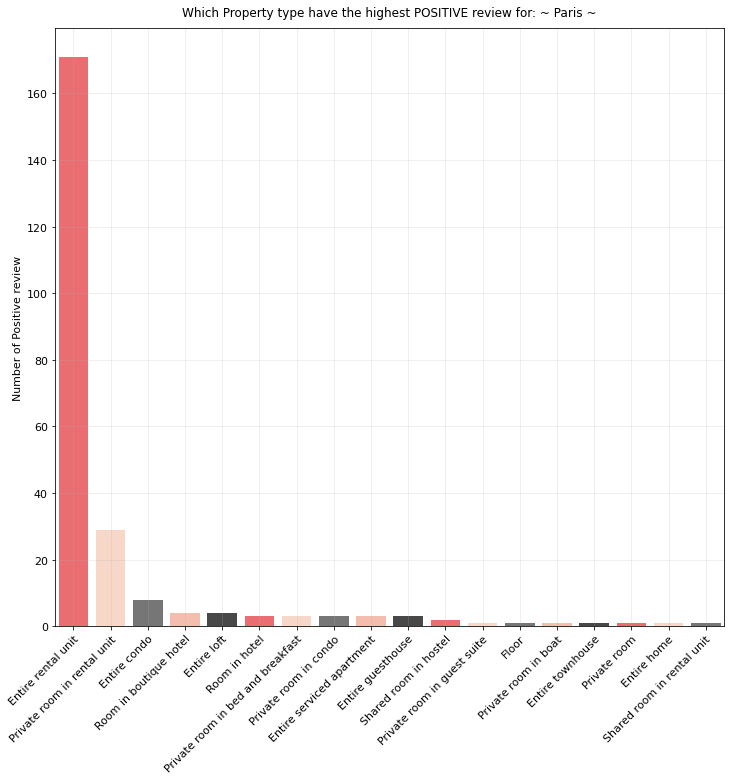

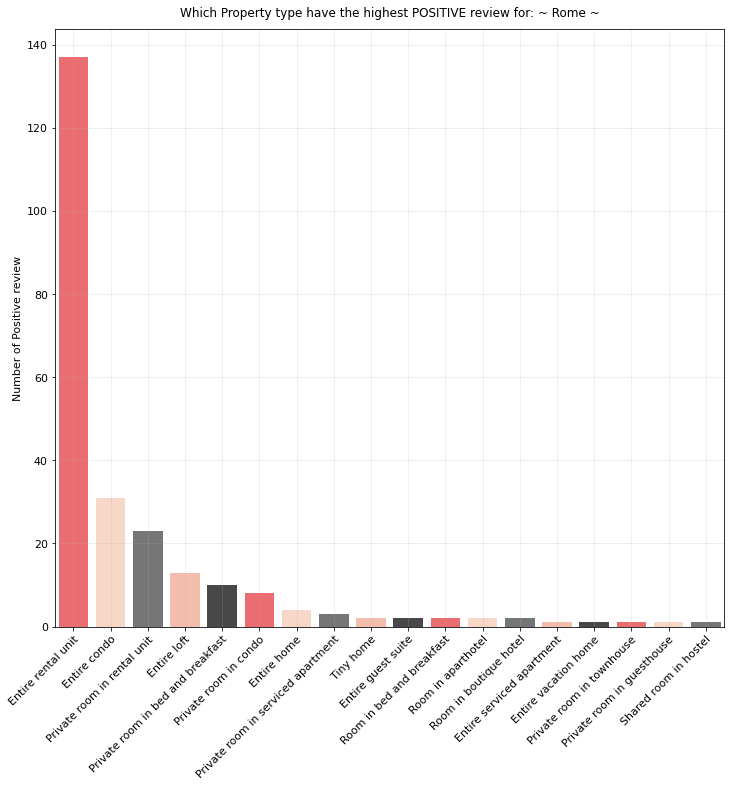

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Creating an object of sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()


def fetch_and_analyze_data(city_name, SAMPLE_SIZE=250):
    # Determine the table name
    table_name = f"{city_name}_listing"

    def truncate_long_comments(comment):
        return comment[:500] if len(comment) > 500 else comment

    combined_query = f"""
    --SELECT L.id, L.price, R.comments
    SELECT *
    FROM {table_name} AS L
    INNER JOIN {table_name.replace('listing', 'review')} AS R ON L.id = R.listing_id
    --JOIN {table_name.replace('listing', 'review')} AS R ON L.id = R.listing_id
    --WHERE host_is_superhost = 'f'
    ORDER BY RANDOM() 
    LIMIT {SAMPLE_SIZE}
    """

    df = pd.read_sql(combined_query, engine)
    df['comments'] = df['comments'].apply(truncate_long_comments)
    df['sentiment'] = df['comments'].apply(lambda body: sia.polarity_scores(str(body)))
    df['compound']=df['sentiment'].apply(lambda score_dict:score_dict['compound'])

    df['type']=''
    df.loc[df.compound >= 0.05,'type']='postive'
    df.loc[(df.compound > -0.05) & (df.compound < 0.05),'type'] ='neutral'
    df.loc[df.compound <= -0.05,'type']='negative'
    
    # Sampling comments
    pos_comment = df.loc[df['type'] == 'postive']
    neu_comment = df.loc[df['type'] == 'neutral']
    neg_comment = df.loc[df['type'] == 'negative']
   
    return df

def print_bar(df, city_name):
    
    only_positive = df.loc[df['type']=='postive']
    
    # Setting plots
    fig, axes = plt.subplots(ncols=1, figsize=(12, 11))
    custom_palette = ["#FF595E", "#FFD4BF", "#767676", "#FFB8A2", "#484848"]
        
    # PLotting
    ax1 = sns.countplot(data=only_positive, x='property_type', order=only_positive.property_type.value_counts().index, palette = custom_palette)
    
    ax1.set_title(f"Which Property type have the highest POSITIVE review for: ~ {city_name.capitalize()} ~", y=1.01)
    ax1.set(xlabel=None)
    plt.xticks(rotation=45, fontsize="11", ha='right', rotation_mode='anchor')
    plt.yticks(rotation=0, fontsize="11")
    plt.ylabel('Number of Positive review',fontsize="11")
    plt.grid(alpha = 0.25)
    
# Call the functions
cities = ['amsterdam', 'london', 'new_york', 'paris', 'rome']

for city in cities:
    city_df = fetch_and_analyze_data(city)
    print_bar(city_df, city)

[Back To Top](#home)

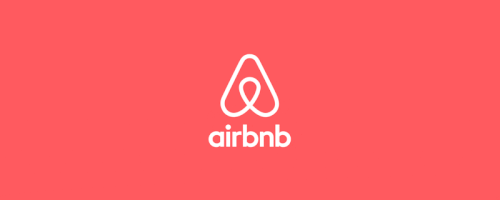